# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [86]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merge_df = pd.merge(mouse_metadata, study_results, on = "Mouse ID")
merge_df
# Display the data table for preview


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [88]:
# Checking the number of mice.
unique_mice_IDs_number = merge_df["Mouse ID"].nunique()
print(f"Number of unique mice IDs: {unique_mice_IDs_number}")

Number of unique mice IDs: 249


In [120]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = merge_df.loc[merge_df.duplicated(subset=["Mouse ID", "Timepoint"])]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [128]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mice_df = merge_df.loc[merge_df["Mouse ID"] == "g989", :]
duplicate_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [130]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data_df = merge_df[merge_df["Mouse ID"].isin(duplicate_mice)==False]
cleaned_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [132]:
# Checking the number of mice in the clean DataFrame.
updated_mice_number = cleaned_data_df["Mouse ID"].nunique()
updated_mice_number

249

## Summary Statistics

In [140]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = cleaned_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median = cleaned_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance = cleaned_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std_dev = cleaned_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem = cleaned_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

summary_stats = pd.DataFrame({
    "Mean Tumor Volume": mean,
    "Median Tumor Volume": median,
    "Variance Tumor Volume": variance,
    "Tumor Volume Std. Dev.": std_dev,
    "Tumor Volume Std. Err.": sem
})

summary_stats    
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.


,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [144]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
agg_summary_stats = cleaned_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    Mean = "mean", 
    Median = "median", 
    Variance = "var", 
    Std_dev = "std",
    SEM = "sem")

agg_summary_stats 
# Using the aggregation method, produce the same summary statistics in a single line


,Mean,Median,Variance,Std_dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

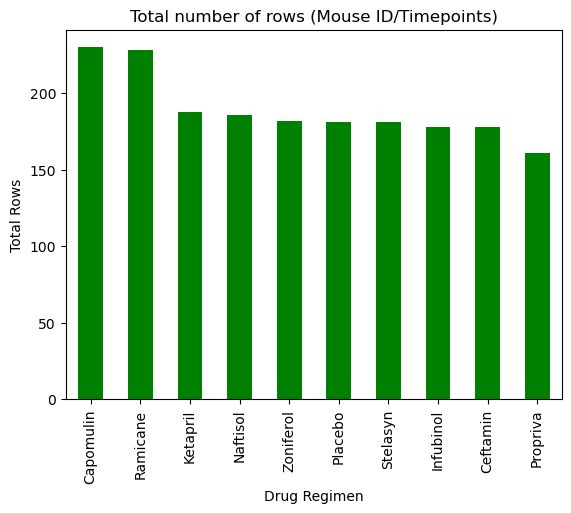

In [148]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
row_number = cleaned_data_df["Drug Regimen"].value_counts()
row_number.plot(kind = "bar", title = "Total number of rows (Mouse ID/Timepoints)", xlabel = "Drug Regimen", ylabel = "Total Rows", color = "green")
plt.show()


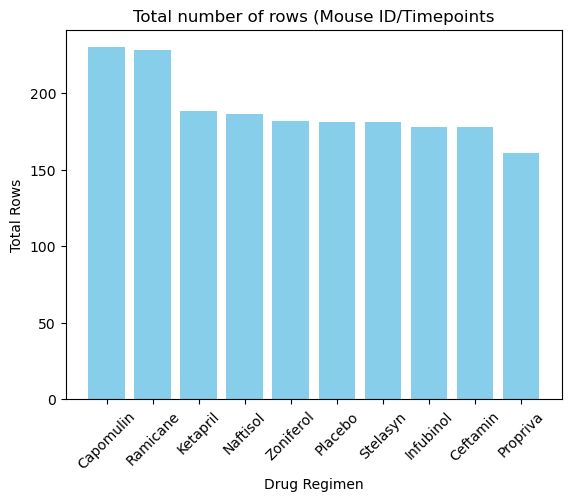

In [152]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
row_number = cleaned_data_df["Drug Regimen"].value_counts()
plt.bar(row_number.index, row_number.values, color = "skyblue")
plt.title("Total number of rows (Mouse ID/Timepoints")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Rows")
plt.xticks(rotation=45)
plt.show()

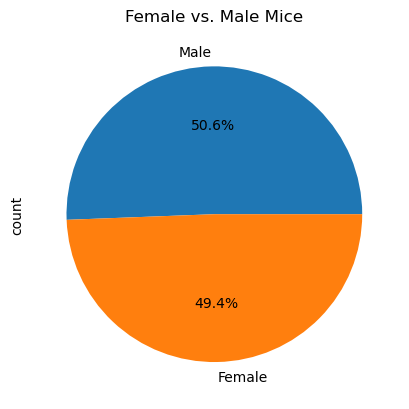

In [156]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
mice_gender = cleaned_data_df["Sex"].value_counts()
plt.title("Female vs. Male Mice")
mice_gender.plot.pie(autopct="%1.1f%%")
plt.show()
# Get the unique mice with their gender


# Make the pie chart


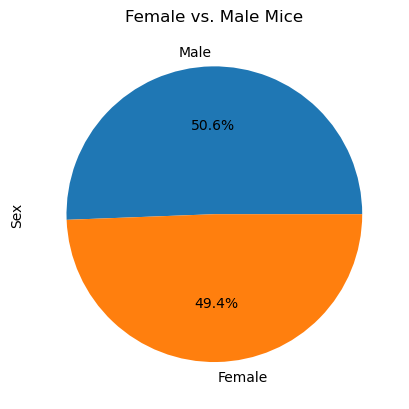

In [158]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
labels = ["Female", "Male"]
plot = mice_gender.plot.pie(y="Total Count", autopct="%1.1f%%")
plt.title("Female vs. Male Mice")
plt.ylabel("Sex")
plt.show()
# Get the unique mice with their gender


# Make the pie chart


## Quartiles, Outliers and Boxplots

In [233]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

merged_data = {}

for treatment in treatment_list:
    treatment_df = cleaned_data_df.loc[cleaned_data_df["Drug Regimen"]== treatment]
  
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = treatment_df.groupby("Mouse ID").max()["Timepoint"]
last_timepoint_df = pd.DataFrame(last_timepoint)

                               
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged = pd.merge(last_timepoint_df, cleaned_data_df, on=["Mouse ID","Timepoint"])
merged_data[treatment] = merged

display(merged.style.set_caption(f"Data for {treatment}"))

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2
5,h531,5,Ceftamin,Male,5,27,47.784682,0
6,j296,45,Ceftamin,Female,24,30,61.849023,3
7,k210,45,Ceftamin,Male,15,28,68.923185,3
8,l471,45,Ceftamin,Female,7,28,67.748662,1
9,l490,30,Ceftamin,Male,24,26,57.918381,3


In [237]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatment_list:
    treatment_df = cleaned_data_df[cleaned_data_df["Drug Regimen"] == treatment]
    tumor_volume = treatment_df["Tumor Volume (mm3)"]

    tumor_volumes.append(tumor_volume)
    quartiles = tumor_volume.quantile([0.25, 0.5, 0.75])
    Q1 = quartiles[0.25]
    Q3 = quartiles[0.75]
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR   
               
    outliers = tumor_volume[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]
            
print(f"{treatment} Summary:")
print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
print(f"Outliers: {outliers.values if not outliers.empty else 'None'}")
print("-" * 30)

    # Locate the rows which contain mice on each drug and get the tumor volumes


    # add subset


    # Determine outliers using upper and lower bounds


Ceftamin Summary:
Q1: 47.2084271125, Q3: 56.801437570000004, IQR: 9.593010457500007
Lower Bound: 32.81891142624998, Upper Bound: 71.19095325625001
Outliers: None
------------------------------


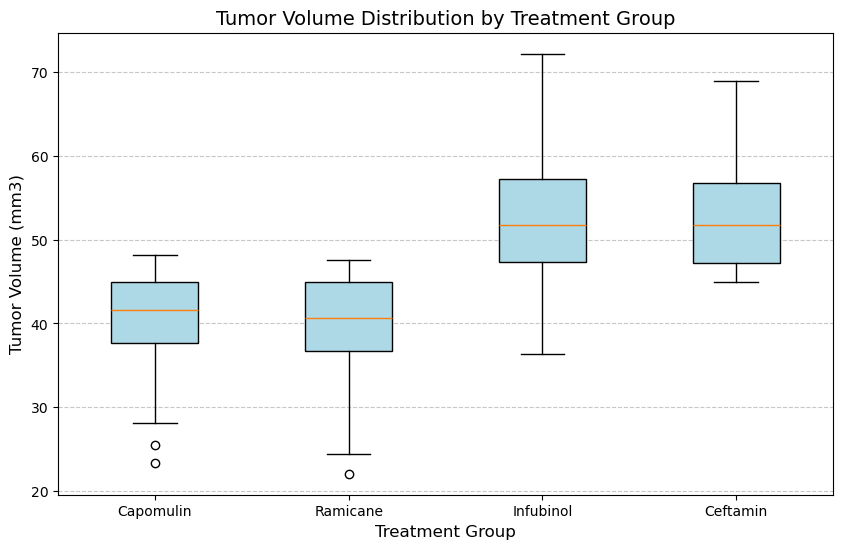

In [262]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
tumor_data = [
    cleaned_data_df[cleaned_data_df["Drug Regimen"] == treatment]["Tumor Volume (mm3)"] 
    for treatment in treatment_list
]

plt.figure(figsize=(10, 6))
plt.boxplot(tumor_data, tick_labels=treatment_list, patch_artist=True, boxprops=dict(facecolor="lightblue"))

plt.title("Tumor Volume Distribution by Treatment Group", fontsize=14)
plt.xlabel("Treatment Group", fontsize=12)
plt.ylabel("Tumor Volume (mm3)", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

## Line and Scatter Plots

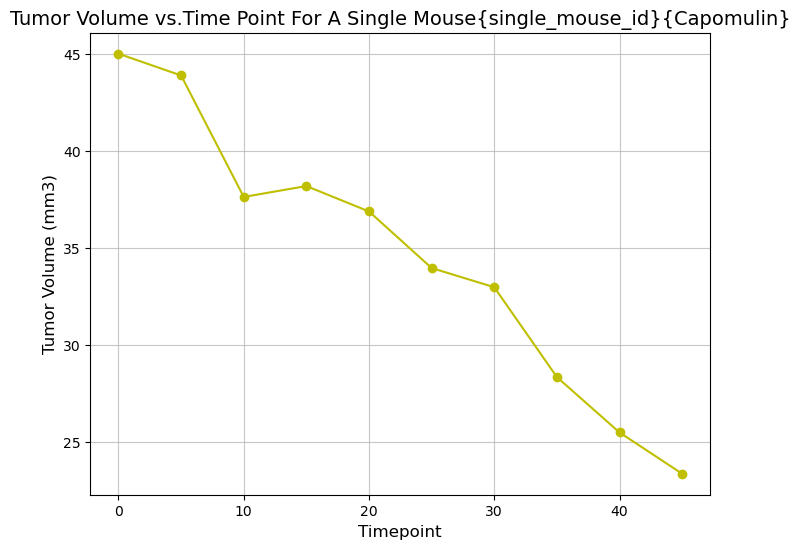

In [266]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_data = cleaned_data_df[cleaned_data_df["Drug Regimen"] == "Capomulin"]

single_mouse_id = capomulin_data["Mouse ID"].iloc[0]
single_mouse_data = capomulin_data[capomulin_data["Mouse ID"] == single_mouse_id]

plt.figure(figsize = (8,6))
plt.plot(single_mouse_data["Timepoint"], single_mouse_data["Tumor Volume (mm3)"], marker = "o", linestyle="-", color = "y")

plt.title("Tumor Volume vs.Time Point For A Single Mouse{single_mouse_id}{Capomulin}", fontsize=14)
plt.xlabel("Timepoint", fontsize=12)
plt.ylabel("Tumor Volume (mm3)", fontsize=12)
plt.grid(alpha=0.7)
plt.show()


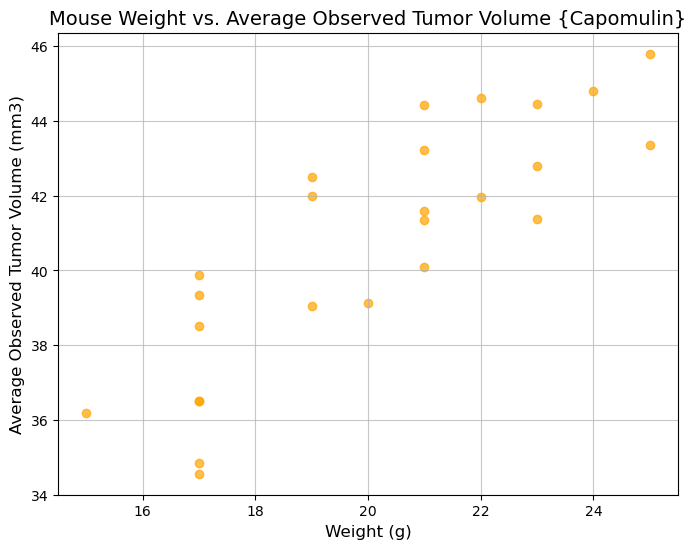

In [274]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
avr_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
mouse_weight = capomulin_data.groupby("Mouse ID")["Weight (g)"].mean()

plt.figure(figsize = (8,6))
plt.scatter(mouse_weight, avr_tumor_volume, color = "orange", alpha=0.7)

plt.title("Mouse Weight vs. Average Observed Tumor Volume {Capomulin}", fontsize=14)
plt.xlabel("Weight (g)", fontsize=12)
plt.ylabel("Average Observed Tumor Volume (mm3)", fontsize=12)
plt.grid(alpha=0.7)
plt.show()

## Correlation and Regression

The correlation coefficient between mouse weight and average tumor volume is 0.84
Linear Regression Model: y = 0.95x + 21.55
The R-squared value is: 0.709


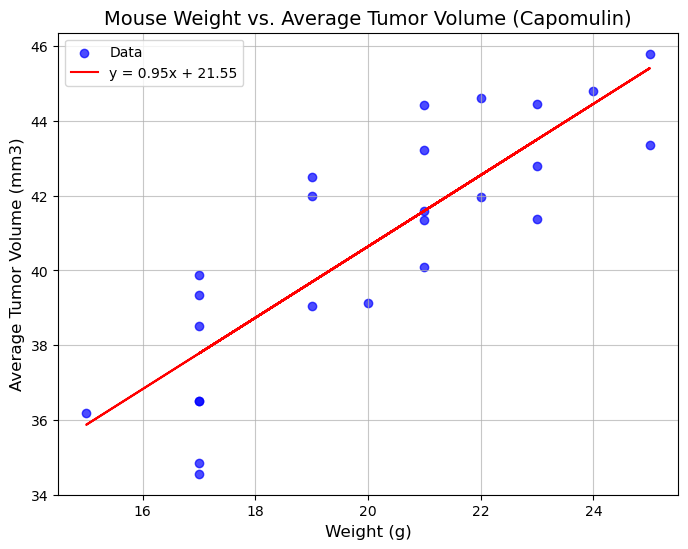

In [310]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
avr_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
mouse_weight = capomulin_data.groupby("Mouse ID")["Weight (g)"].mean()

correlation = avr_tumor_volume.corr(mouse_weight)
print(f"The correlation coefficient between mouse weight and average tumor volume is {round(correlation, 2)}")

x_mean = mouse_weight.mean()
y_mean = avr_tumor_volume.mean()
slope = sum((mouse_weight - x_mean) * (avr_tumor_volume - y_mean)) / sum((mouse_weight - x_mean) ** 2)
intercept = y_mean - slope * x_mean

regress_values = slope * mouse_weight + intercept

ss_total = sum((avr_tumor_volume - y_mean) ** 2)
ss_residual = sum((avr_tumor_volume - regress_values) ** 2)
r_squared = 1 - (ss_residual / ss_total)

print(f"Linear Regression Model: y = {round(slope, 2)}x + {round(intercept, 2)}")
print(f"The R-squared value is: {round(r_squared, 3)}")

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(mouse_weight, avr_tumor_volume, color="blue", alpha=0.7, label="Data")
plt.plot(mouse_weight, regress_values, color="red", label=f"y = {round(slope, 2)}x + {round(intercept, 2)}")
plt.xlabel("Weight (g)", fontsize=12)
plt.ylabel("Average Tumor Volume (mm3)", fontsize=12)
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin)", fontsize=14)
plt.legend(fontsize=10)
plt.grid(alpha=0.7)
plt.show()